Méthode de Strejc (identification d'un comportement)

L'idée est d'identifier un système d'ordre superieur à 2

In [20]:
import control
import matplotlib.pyplot as plt
import numpy as np

1 -0.00016767640339025277 -0.00017098557833515834 1.019735483812852
2 0.10361705714293848 0.2816765907037917 2.718438435432713
3 0.21799033985641592 0.8054117750079931 3.6947131489335496
4 0.31932235482363963 1.4253541105876824 4.463684076784725
5 0.410296848674666 2.100155569556645 5.118624664899407
6 0.49328486252393755 2.811303117148898 5.699147350203706
7 0.5700224607259505 3.548889531896895 6.22587665646932
8 0.6417065509066155 4.306785290804088 6.7114560147771245
9 0.7092328041109403 5.080985301199535 7.1640585034258395
10 0.7731974388150367 5.868477245744027 7.589881899683681


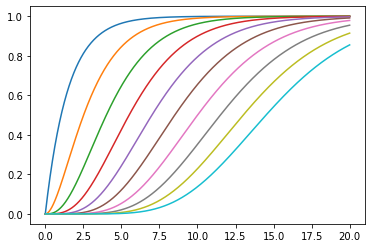

In [119]:
s = control.TransferFunction.s
T=2
tau=1.5
num_pade,den_pade=control.pade(T,5)
delay=control.tf(num_pade,den_pade)
n=4
Tarr=np.linspace(0,20,1024)
for n in range(1,11):
    #G1=delay/((tau*s+1)**n)
    G1=1/((tau*s+1)**n)
    #print(G1)
    #print(G1.pole())
    t,y=control.step_response(G1,Tarr)
    plt.plot(t,y)

    dyp=0
    for i in range(len(t)):
        dyn=y[i]-y[i-1]
        dt=t[i]-t[i-1]
        #print(dy/dt,dyn-dyp)
        if dyn-dyp<0 and i !=0 :
            pente=dyn/dt
            t2=(1-y[i-1])/pente
            t1=y[i-1]/pente
            Ta=t2+t1
            Tu=t[i-1]-t1
            print(n,Tu/Ta,Tu/tau,Ta/tau)
            break
        dyp=dyn
